# Add some additional layers of information to the hierarchy

Requires DDOT for ontology parsing https://github.com/michaelkyu/ddot/blob/master/examples/Tutorial.ipynb

In [1]:
# load required packages

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd
import random

import ndex2
import getpass

from IPython.display import display

# latex rendering of text in graphs
import matplotlib as mpl
mpl.rc('text', usetex = False)
mpl.rc('font', family = 'serif')

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

sns.set(font_scale=1.4)

sns.set_style('white')

sns.set_style("ticks", {"xtick.major.size": 15, "ytick.major.size": 15})
plt.rcParams['svg.fonttype'] = 'none'

import sys

# % matplotlib inline

In [2]:
# need ddot to parse the ontology
import ddot
from ddot import Ontology

In [3]:
# ddot only compatible with nx 1.11....
nx.__version__

'2.5.1'

# Load interactome (needs to be the same one used in previous analysis)

In [4]:


interactome_uuid='275bd84e-3d18-11e8-a935-0ac135e8bacf' # for STRING high confidence
ndex_server='public.ndexbio.org'
ndex_user=None
ndex_password=None
G_PC = ndex2.create_nice_cx_from_server(
            ndex_server, 
            username=ndex_user, 
            password=ndex_password, 
            uuid=interactome_uuid
        ).to_networkx(mode='default')

# relabel nodes.... this is a nx 1.11 thing...
# G_PC_data = pd.DataFrame.from_dict(dict(G_PC.nodes(data=True)), orient='index')
# G_PC = nx.relabel_nodes(G_PC,dict(zip(G_PC_data.index.tolist(),G_PC_data['name'].tolist())))
# print(G_PC.nodes()[0:5])
# nodes = G_PC.nodes()

# # print out interactome num nodes and edges for diagnostic purposes
# print('number of nodes:')
# print(len(G_PC.nodes()))
# print('\nnumber of edges:')
# print(len(G_PC.edges()))

# ------ nx 2.1 ------
nodes = G_PC.nodes()

# print out interactome num nodes and edges for diagnostic purposes
print('number of nodes:')
print(len(G_PC.nodes()))
print('\nnumber of edges:')
print(len(G_PC.edges()))

number of nodes:
17185

number of edges:
420534


# Load ASD rare-common hierarchy from ndex


In [68]:
ASD_uuid='d27ca9ef-bce5-11eb-9e72-0ac135e8bacf'
ndex_server='public.ndexbio.org'
#ndex_user='sbrosenthal@health.ucsd.edu'
ndex_user = 'sol015'
ndex_password=getpass.getpass('NDEx password: ')
G_ASD = ndex2.create_nice_cx_from_server(
            ndex_server, 
            username=ndex_user, 
            password=ndex_password, 
            uuid=ASD_uuid
        ).to_networkx(mode='default')
nodes = G_ASD.nodes()

# print out interactome num nodes and edges for diagnostic purposes
print('number of nodes:')
print(len(G_ASD.nodes()))
print('\nnumber of edges:')
print(len(G_ASD.edges()))

NDEx password: ········
number of nodes:
41

number of edges:
45


In [6]:
G_ASD.nodes()

NodeView((8625, 8626, 8594, 8627, 8596, 8628, 8621, 8622, 8623, 8591, 8624, 8617, 8586, 8619, 8620, 8615, 8616, 8584, 8609, 8610, 8612, 8637, 8638, 8607, 8639, 8608, 8640, 8633, 8634, 8602, 8603, 8635, 8604, 8636, 8597, 8629, 8630, 8631, 8599, 8632, 8600))

In [7]:
# add node attributes to dataframe for easier access
ASD_clust_df = pd.DataFrame.from_dict(dict(G_ASD.nodes(data=True)), orient='index')
# relabel nodes in G_ASD
# G_ASD=nx.relabel_nodes(G_ASD,dict(ASD_clust_df['CD_CommunityName']))
ASD_clust_df['system_ID']=ASD_clust_df.index.tolist()
# some columns are not the right type
ASD_clust_df['CD_MemberList_Size']=[int(x) for x in ASD_clust_df['CD_MemberList_Size'].tolist()]
ASD_clust_df['HiDeF_persistence']=[int(x) for x in ASD_clust_df['HiDeF_persistence'].tolist()]
ASD_clust_df.head()

,CD_MemberList,CD_AnnotatedMembers_Size,CD_AnnotatedMembers_Pvalue,CommunityDetectionTally::Unmatched,CD_AnnotatedMembers,CD_CommunityName,CD_AnnotatedMembers_Overlap,HiDeF_persistence,CD_AnnotatedMembers_SourceTerm,CD_MemberList_LogSize,CommunityDetectionTally::ASD_rare_seeds,CD_Labeled,CommunityDetectionTally::ASD_common_seeds,CD_AnnotatedAlgorithm,CD_NonAnnotatedMembers,CD_AnnotatedMembers_SourceDB,CD_MemberList_Size,name,system_ID
8625,AP1AR ARL17A ARL4A ARL4D C3orf30 CCDC120 CYTH1...,3,3.9541413915963526E-6,15,CYTH1 CYTH2 IQSEC2,ARF protein signal transduction,0.107,140,GO:0032011,4.087,1,true,1,Annotated by gProfiler [Docker: coleslawndex/c...,AP1AR ARL17A ARL4A ARL4D C3orf30 CCDC120 GOLGA...,GO:BP,17,C438120,8625
8626,EPYC GPR124 LINGO2 LPHN3 LRRC15 LRRC3 LRRC3B L...,4,1.215110097888934E-7,16,LRRC4C LRRTM2 LRRTM3 LRRTM4,integral component of postsynaptic density mem...,0.065,163,GO:0099061,4.087,1,true,0,Annotated by gProfiler [Docker: coleslawndex/c...,EPYC GPR124 LINGO2 LPHN3 LRRC15 LRRC3 LRRC3B L...,GO:CC,17,C438119,8626
8594,CTNNAL1 KCNA3 KCNMA1 LRRC10 LRRC26 TMEM245,2,2.0624700942156015E-6,5,KCNMA1 LRRC26,KCNMA1-LRRC26 complex,0.333,15,CORUM:6748,2.585,1,true,0,Annotated by gProfiler [Docker: coleslawndex/c...,CTNNAL1 KCNA3 LRRC10 TMEM245,CORUM,6,C438151,8594
8627,ABCC8 ABCC9 CDKAL1 CDX1 CTNNB1 DCD FOXA1 FZD7 ...,3,1.6631924655444714E-8,16,ABCC8 ABCC9 KCNJ11,ATP sensitive Potassium channels,0.15,21,REAC:R-HSA-1296025,4.248,3,true,0,Annotated by gProfiler [Docker: coleslawndex/c...,CDKAL1 CDX1 CTNNB1 DCD FOXA1 FZD7 HHEX IGF2BP2...,REAC,19,C438118,8627
8596,AIF1 DCX GFAP MAP2 ensembl:ENSP00000320295 ens...,0,NaN,5,NaN,(none),0.0,23,NaN,2.585,1,false,0,Annotated by gProfiler [Docker: coleslawndex/c...,NaN,NaN,6,C438149,8596


In [8]:
G_ASD.nodes()

NodeView((8625, 8626, 8594, 8627, 8596, 8628, 8621, 8622, 8623, 8591, 8624, 8617, 8586, 8619, 8620, 8615, 8616, 8584, 8609, 8610, 8612, 8637, 8638, 8607, 8639, 8608, 8640, 8633, 8634, 8602, 8603, 8635, 8604, 8636, 8597, 8629, 8630, 8631, 8599, 8632, 8600))

# Add some annotation the the systems 

- Fraction rare/common/neither seeds


## Do we need to pull down the other network for this?

In [9]:
ASD_clust_df.head()

,CD_MemberList,CD_AnnotatedMembers_Size,CD_AnnotatedMembers_Pvalue,CommunityDetectionTally::Unmatched,CD_AnnotatedMembers,CD_CommunityName,CD_AnnotatedMembers_Overlap,HiDeF_persistence,CD_AnnotatedMembers_SourceTerm,CD_MemberList_LogSize,CommunityDetectionTally::ASD_rare_seeds,CD_Labeled,CommunityDetectionTally::ASD_common_seeds,CD_AnnotatedAlgorithm,CD_NonAnnotatedMembers,CD_AnnotatedMembers_SourceDB,CD_MemberList_Size,name,system_ID
8625,AP1AR ARL17A ARL4A ARL4D C3orf30 CCDC120 CYTH1...,3,3.9541413915963526E-6,15,CYTH1 CYTH2 IQSEC2,ARF protein signal transduction,0.107,140,GO:0032011,4.087,1,true,1,Annotated by gProfiler [Docker: coleslawndex/c...,AP1AR ARL17A ARL4A ARL4D C3orf30 CCDC120 GOLGA...,GO:BP,17,C438120,8625
8626,EPYC GPR124 LINGO2 LPHN3 LRRC15 LRRC3 LRRC3B L...,4,1.215110097888934E-7,16,LRRC4C LRRTM2 LRRTM3 LRRTM4,integral component of postsynaptic density mem...,0.065,163,GO:0099061,4.087,1,true,0,Annotated by gProfiler [Docker: coleslawndex/c...,EPYC GPR124 LINGO2 LPHN3 LRRC15 LRRC3 LRRC3B L...,GO:CC,17,C438119,8626
8594,CTNNAL1 KCNA3 KCNMA1 LRRC10 LRRC26 TMEM245,2,2.0624700942156015E-6,5,KCNMA1 LRRC26,KCNMA1-LRRC26 complex,0.333,15,CORUM:6748,2.585,1,true,0,Annotated by gProfiler [Docker: coleslawndex/c...,CTNNAL1 KCNA3 LRRC10 TMEM245,CORUM,6,C438151,8594
8627,ABCC8 ABCC9 CDKAL1 CDX1 CTNNB1 DCD FOXA1 FZD7 ...,3,1.6631924655444714E-8,16,ABCC8 ABCC9 KCNJ11,ATP sensitive Potassium channels,0.15,21,REAC:R-HSA-1296025,4.248,3,true,0,Annotated by gProfiler [Docker: coleslawndex/c...,CDKAL1 CDX1 CTNNB1 DCD FOXA1 FZD7 HHEX IGF2BP2...,REAC,19,C438118,8627
8596,AIF1 DCX GFAP MAP2 ensembl:ENSP00000320295 ens...,0,NaN,5,NaN,(none),0.0,23,NaN,2.585,1,false,0,Annotated by gProfiler [Docker: coleslawndex/c...,NaN,NaN,6,C438149,8596


# System validation with mammalian phenotype ontology + mouse KO data

Parse the ontology, data from http://www.informatics.jax.org/vocab/mp_ontology

In [10]:
from scipy.stats import hypergeom
from statsmodels.stats import contingency_tables

import requests

# find human orthologs of mouse genes
import mygene
mg = mygene.MyGeneInfo()

In [11]:
# download MGI phenotype data
url = 'http://www.informatics.jax.org/downloads/reports/MGI_PhenoGenoMP.rpt'
r = requests.get(url,allow_redirects=True)
open('MGI_PhenoGenoMP.rpt','wb').write(r.content)

43481153

In [12]:
mgi_df = pd.read_csv('MGI_PhenoGenoMP.rpt',sep='\t',
                    names=['MGI_Allele_Accession_ID','Allele symbol','involves','MP','PMID','MGI_marker_accession_ID'])
# extract gene names
gene_name = [a.split('<')[0] for a in mgi_df['Allele symbol'].tolist()]
mgi_df['gene_name']=gene_name
mgi_df.index=mgi_df['gene_name']
mgi_df.head()

,MGI_Allele_Accession_ID,Allele symbol,involves,MP,PMID,MGI_marker_accession_ID,gene_name
gene_name,,,,,,,
Rb1,Rb1<tm1Tyj>/Rb1<tm1Tyj>,Rb1<tm1Tyj>,involves: 129S2/SvPas,MP:0000600,12529408,MGI:97874,Rb1
Rb1,Rb1<tm1Tyj>/Rb1<tm1Tyj>,Rb1<tm1Tyj>,involves: 129S2/SvPas,MP:0001716,16449662,MGI:97874,Rb1
Rb1,Rb1<tm1Tyj>/Rb1<tm1Tyj>,Rb1<tm1Tyj>,involves: 129S2/SvPas,MP:0001698,16449662,MGI:97874,Rb1
Rb1,Rb1<tm1Tyj>/Rb1<tm1Tyj>,Rb1<tm1Tyj>,involves: 129S2/SvPas,MP:0001092,16449662,MGI:97874,Rb1
Rb1,Rb1<tm1Tyj>/Rb1<tm1Tyj>,Rb1<tm1Tyj>,involves: 129S2/SvPas,MP:0000961,16449662,MGI:97874,Rb1


In [13]:
mouse_genes = list(np.unique(mgi_df['gene_name']))
# mouse_genes = [g for g in mouse_genes if (not g.startswith('+'))]
mg_mapped = mg.querymany(mouse_genes,as_dataframe=True,species=['mouse','human'],scopes='symbol',fields='symbol')
mg_mapped.head()

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-22000...done.
querying 22001-23000...done.
querying 23001-24000...done.
querying 24001-24060...done.
Finished.
34 input query terms found dup hits:
	[('Adam1a', 2), ('Adam1b', 2), ('Ccdc39', 2), ('Chaserr', 2), ('Dnm3os', 2), ('Eldr', 2), ('Fer1l4',
12225 input query terms found no hit:
	['+|Cav1', '+|Cm', '+|Del(10Prmt2-Pdxk)4Yey', '+|Del(11Mpo-Chad)18Brd', '+|Del(11Stat5a-Stat5b)1Mam'
Pass "re

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/biothings_client/base.py:143: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(obj)


,notfound,_id,_score,symbol
query,,,,
+|Cav1,True,NaN,NaN,NaN
+|Cm,True,NaN,NaN,NaN
+|Del(10Prmt2-Pdxk)4Yey,True,NaN,NaN,NaN
+|Del(11Mpo-Chad)18Brd,True,NaN,NaN,NaN
+|Del(11Stat5a-Stat5b)1Mam,True,NaN,NaN,NaN


In [14]:
# drop genes with no human ortholog
print(len(mg_mapped))
mg_mapped = mg_mapped.dropna(subset=['symbol'])
print(len(mg_mapped))
# drop duplicates
mg_mapped = mg_mapped[~mg_mapped.index.duplicated(keep='first')]
print(len(mg_mapped))
mg_mapped.head()

mgi_df['human_ortholog']=mgi_df['gene_name'].map(dict(mg_mapped['symbol']))
mgi_df.head()

24102
11877
11835


,MGI_Allele_Accession_ID,Allele symbol,involves,MP,PMID,MGI_marker_accession_ID,gene_name,human_ortholog
gene_name,,,,,,,,
Rb1,Rb1<tm1Tyj>/Rb1<tm1Tyj>,Rb1<tm1Tyj>,involves: 129S2/SvPas,MP:0000600,12529408,MGI:97874,Rb1,RB1
Rb1,Rb1<tm1Tyj>/Rb1<tm1Tyj>,Rb1<tm1Tyj>,involves: 129S2/SvPas,MP:0001716,16449662,MGI:97874,Rb1,RB1
Rb1,Rb1<tm1Tyj>/Rb1<tm1Tyj>,Rb1<tm1Tyj>,involves: 129S2/SvPas,MP:0001698,16449662,MGI:97874,Rb1,RB1
Rb1,Rb1<tm1Tyj>/Rb1<tm1Tyj>,Rb1<tm1Tyj>,involves: 129S2/SvPas,MP:0001092,16449662,MGI:97874,Rb1,RB1
Rb1,Rb1<tm1Tyj>/Rb1<tm1Tyj>,Rb1<tm1Tyj>,involves: 129S2/SvPas,MP:0000961,16449662,MGI:97874,Rb1,RB1


In [15]:
url = 'http://www.informatics.jax.org/downloads/reports/MPheno_OBO.ontology'
r = requests.get(url,allow_redirects=True)
open('MPheno_OBO.ontology','wb').write(r.content)
ddot.parse_obo('MPheno_OBO.ontology',
               'parsed_mp.txt',
              'id2name_mp.txt',
              'id2namespace_mp.txt',
              'altID_mp.txt')

In [16]:
MP2desc = pd.read_csv('id2name_mp.txt',sep='\t',
                      names=['MP','description'],index_col='MP')

MP2desc=MP2desc.loc[MP2desc.index.dropna()] # drop NAN from index
print(len(MP2desc))


MP2desc.head()

14444


,description
MP,
MP:0000001,mammalian phenotype
MP:0000002,obsolete Morphology
MP:0000003,abnormal adipose tissue morphology
MP:0000011,abnormal adipose tissue morphology
MP:0000005,increased brown adipose tissue amount


In [17]:

hierarchy = pd.read_table('parsed_mp.txt',
                          sep='\t',
                          header=None,
                          names=['Parent', 'Child', 'Relation', 'Namespace'])

hierarchy.head()

,Parent,Child,Relation,Namespace
0,MP:0005375,MP:0000003,is_a,MPheno.ontology
1,MP:0001778,MP:0000005,is_a,MPheno.ontology
2,MP:0001781,MP:0000008,is_a,MPheno.ontology
3,MP:0005334,MP:0000010,is_a,MPheno.ontology
4,MP:0000003,MP:0000013,is_a,MPheno.ontology


In [18]:
MPO = Ontology.from_table(
    table=hierarchy,
    parent='Parent',
    child='Child',
    add_root_name='MP:00SUPER',
    ignore_orphan_terms=True)
#MPO.clear_node_attr()
#MPO.clear_edge_attr()

# add description to node attribute
terms_keep = list(np.unique(hierarchy['Parent'].tolist()+hierarchy['Child'].tolist()))
MPO.node_attr=MP2desc.loc[terms_keep]

MPO

0 genes, 13311 terms, 0 gene-term relations, 16806 term-term relations
node_attributes: ['description']
edge_attributes: ['Relation', 'Namespace']

In [19]:
print(len(MPO.node_attr))

13311


In [20]:
# find terms related to brain
MP_focal_list = []
for t in MPO.node_attr.index.tolist():
    descr_temp = MPO.node_attr.loc[t]['description']
    if descr_temp.find('nervous')>-1:
        print(descr_temp)
        MP_focal_list.append(t)
    elif descr_temp.find('neuron')>-1:
        print(descr_temp)
        MP_focal_list.append(t)
    elif descr_temp.find('synapt')>-1:
        print(descr_temp)
        MP_focal_list.append(t)
        
print(len(MP_focal_list))

abnormal nervous system tract morphology
hippocampal neuron degeneration
abnormal motor neuron morphology
motor neuron degeneration
decreased motor neuron number
abnormal motor neuron innervation pattern
peripheral nervous system degeneration
abnormal sensory neuron morphology
decreased sensory neuron number
abnormal sensory neuron innervation pattern
abnormal hair guard neuron morphology
absent hair guard neurons
abnormal hair-tylotrich neuron morphology
abnormal hair-down neuron morphology
absent hair-down neurons
abnormal sympathetic neuron morphology
abnormal adrenergic neuron morphology
abnormal peptidergic neuron morphology
abnormal parasympathetic neuron morphology
abnormal cholinergic neuron morphology
abnormal enteric nervous system morphology
abnormal enteric neuron morphology
abnormal enteric cholinergic neuron morphology
absent enteric neurons
failure of neuromuscular synapse presynaptic differentiation
failure of neuromuscular synapse postsynaptic differentiation
impaired 

In [30]:
# test for enrichment in root node
OR_p_list,OR_CI_list,log_OR_list = [],[],[]
num_genes_in_term_list=[]

MP_keep_list = []

# root node is the largest node
root_node = ASD_clust_df['CD_MemberList_Size'].sort_values(ascending=False).head(1).index.tolist()[0]

# get list of node names from G_PC
G_PC_nodes = list(nx.get_node_attributes(G_PC, 'name').values())

# add a negative control phenotype: abnormal skeleton physiology: MP:0001533
for MP_focal in MP_focal_list+['MP:0001533']:
    MP_desc_focal = dict(MP2desc['description'])[MP_focal]

    # focus the hierarchy on one branch, and look up all terms within that branch
    if len(MPO.parent_2_child[MP_focal])>0:
        MPO_focal = MPO.focus(MP_focal,verbose=False)
        focal_terms = MPO_focal.terms
    else: # if the term has no children, just look at that term
        focal_terms=[MP_focal]


    # check enrichment in root node
    focal_genes = ASD_clust_df['CD_MemberList'].loc[root_node].split(' ')
    

    mgi_temp = mgi_df[mgi_df['MP'].isin(focal_terms)]
    mgi_temp = mgi_temp.dropna(subset=['human_ortholog'])
    mgi_genes = list(np.unique(mgi_temp['human_ortholog']))
    mgi_genes = [g.upper() for g in mgi_genes]
    mgi_genes = list(np.intersect1d(mgi_genes,G_PC_nodes)) 
    
    if (len(mgi_genes)>10) and (len(mgi_genes)<2000): # only test if there are at least 10 genes, and fewer than 2000 genes
        print('\n'+MP_desc_focal)
        print('number of genes in root node = '+str(len(focal_genes)))
        print('number of genes in focal MPO term = '+str(len(mgi_genes)))

        q00 = len(np.intersect1d(mgi_genes,focal_genes))
        print('number overlapping genes = '+str(q00))
        q01 = len(mgi_genes)-q00

        q10 = len(focal_genes)-q00
        q11 = len(G_PC_nodes)-q00-q01-q10

        table_temp = [[q00,q01],[q10,q11]]
        print(table_temp)

        CT= contingency_tables.Table2x2(table_temp)
        OR_p_temp = CT.log_oddsratio_pvalue()
        OR_CI_temp = CT.log_oddsratio_confint()
        log_OR_temp = CT.log_oddsratio
        print(OR_p_temp)
        print(OR_CI_temp)
        print(log_OR_temp)
        print(len(mgi_genes))

        OR_p_list.append(OR_p_temp)
        OR_CI_list.append(OR_CI_temp)
        print(OR_CI_temp)
        log_OR_list.append(log_OR_temp)
        num_genes_in_term_list.append(len(mgi_genes))
        
        MP_keep_list.append(MP_focal)

        print(hypergeom.sf(q00,len(G_PC_nodes),len(focal_genes),len(mgi_genes)))
    
OR_CI_lower, OR_CI_upper = zip(*OR_CI_list)

root_KO_df = pd.DataFrame({'OR_p':OR_p_list,'log_OR':log_OR_list,
                           'log_OR_CI_lower':OR_CI_lower,'log_OR_CI_upper':OR_CI_upper,
                          'num_genes_in_term':num_genes_in_term_list},
                          index=MP_keep_list)


abnormal nervous system tract morphology
number of genes in root node = 313
number of genes in focal MPO term = 205
number overlapping genes = 14
[[14, 191], [299, 16681]]
6.451333522213042e-07
(0.8537667806450475, 1.9629651280189453)
1.4083659543319964
205
(0.8537667806450475, 1.9629651280189453)
5.511785065968047e-06

hippocampal neuron degeneration
number of genes in root node = 313
number of genes in focal MPO term = 27
number overlapping genes = 3
[[3, 24], [310, 16848]]
0.0018384755390037915
(0.7104996845006404, 3.121447105928815)
1.9159733952147278
27
(0.7104996845006404, 3.121447105928815)
0.001360850927719033

abnormal motor neuron morphology
number of genes in root node = 313
number of genes in focal MPO term = 166
number overlapping genes = 15
[[15, 151], [298, 16721]]
5.522069217032524e-10
(1.175273548796675, 2.260921593692426)
1.7180975712445505
166
(1.175273548796675, 2.260921593692426)
6.43064872465836e-08

motor neuron degeneration
number of genes in root node = 313
nu


abnormal neuron specification
number of genes in root node = 313
number of genes in focal MPO term = 15
number overlapping genes = 3
[[3, 12], [310, 16860]]
5.6423361891812204e-05
(1.3397036467701544, 3.879961499143373)
2.6098325729567637
15
(1.3397036467701544, 3.879961499143373)
0.00012573911789167603

abnormal neuron apoptosis
number of genes in root node = 313
number of genes in focal MPO term = 231
number overlapping genes = 11
[[11, 220], [302, 16652]]
0.001255581315057185
(0.39798067026285444, 1.6302719645091548)
1.0141263173860047
231
(0.39798067026285444, 1.6302719645091548)
0.0011214067681606875

increased neuron apoptosis
number of genes in root node = 313
number of genes in focal MPO term = 165
number overlapping genes = 7
[[7, 158], [306, 16714]]
0.023641768010143265
(0.1183062966488907, 1.6491576726258028)
0.8837319846373468
165
(0.1183062966488907, 1.6491576726258028)
0.010836266313499772

decreased neuron apoptosis
number of genes in root node = 313
number of genes in 


abnormal synaptic plasticity
number of genes in root node = 313
number of genes in focal MPO term = 64
number overlapping genes = 2
[[2, 62], [311, 16810]]
0.44046695066273744
(-0.8565907670244501, 1.9684889865010116)
0.5559491097382807
64
(-0.8565907670244501, 1.9684889865010116)
0.11117887222952563

abnormal neuronal precursor proliferation
number of genes in root node = 313
number of genes in focal MPO term = 88
number overlapping genes = 8
[[8, 80], [305, 16792]]
5.48697958848289e-06
(0.9702174500210102, 2.4413045337770147)
1.7057609918990124
88
(0.9702174500210102, 2.4413045337770147)
3.1819260258294646e-05

abnormal neuronal precursor cell number
number of genes in root node = 313
number of genes in focal MPO term = 66
number overlapping genes = 6
[[6, 60], [307, 16812]]
8.289550022659348e-05
(0.853651610043056, 2.547179101044473)
1.7004153555437647
66
(0.853651610043056, 2.547179101044473)
0.00019291432700814078

increased neuronal precursor cell number
number of genes in root 


reduced AMPA-mediated synaptic currents
number of genes in root node = 313
number of genes in focal MPO term = 14
number overlapping genes = 3
[[3, 11], [310, 16861]]
3.713568830942822e-05
(1.41536924330215, 3.9784372770349066)
2.6969032601685283
14
(1.41536924330215, 3.9784372770349066)
9.35469785889883e-05

abnormal excitatory postsynaptic current amplitude
number of genes in root node = 313
number of genes in focal MPO term = 35
number overlapping genes = 5
[[5, 30], [308, 16842]]
5.556643128096105e-06
(1.2563355089745654, 3.16320807780205)
2.209771793388308
35
(1.2563355089745654, 3.16320807780205)
3.61856391718878e-05

increased excitatory postsynaptic current amplitude
number of genes in root node = 313
number of genes in focal MPO term = 13
number overlapping genes = 3
[[3, 10], [310, 16862]]
2.381154142406577e-05
(1.4971851914173988, 4.087360301937588)
2.7922727466774937
13
(1.4971851914173988, 4.087360301937588)
6.778963975571437e-05

decreased excitatory postsynaptic current

In [31]:
root_KO_df['MP_description']=root_KO_df.index.map(dict(MP2desc['description']))

root_KO_df=root_KO_df.sort_values('OR_p')
# root_KO_df=root_KO_df.sort_values('log_OR',ascending=False)
root_KO_df.head(10)

,OR_p,log_OR,log_OR_CI_lower,log_OR_CI_upper,num_genes_in_term,MP_description
MP:0009937,3.503585e-19,1.798440,1.404669,2.192211,321,abnormal neuron differentiation
MP:0002882,2.818545e-18,1.190001,0.922484,1.457519,1502,abnormal neuron morphology
MP:0002272,4.707309e-15,1.641401,1.230770,2.052032,330,abnormal nervous system electrophysiology
MP:0008946,9.967545e-15,1.451961,1.084272,1.819650,502,abnormal neuron number
MP:0002206,2.951031e-14,1.244242,0.923384,1.565101,844,abnormal CNS synaptic transmission
MP:0003635,8.274042e-14,1.159816,0.855338,1.464294,1044,abnormal synaptic transmission
MP:0008948,4.851458e-13,1.456963,1.061965,1.851960,421,decreased neuron number
MP:0002752,1.991863e-11,1.084532,0.767584,1.401479,998,abnormal somatic nervous system morphology
MP:0008947,7.690287e-11,2.139936,1.495323,2.784549,83,increased neuron number
MP:0000965,3.194562e-10,1.281421,0.882069,1.680773,476,abnormal sensory neuron morphology


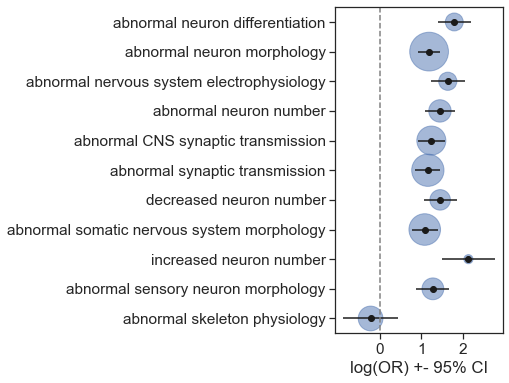

In [32]:
plt.figure(figsize=(3,6))
terms_plot = root_KO_df.head(10).index.tolist()+['MP:0001533'] # top 10 + positive controls

plt.errorbar(root_KO_df.loc[terms_plot]['log_OR'],np.arange(len(terms_plot)),
            xerr=[np.subtract(root_KO_df.loc[terms_plot]['log_OR'],root_KO_df.loc[terms_plot]['log_OR_CI_lower']),
                   np.subtract(root_KO_df.loc[terms_plot]['log_OR_CI_upper'],root_KO_df.loc[terms_plot]['log_OR'])],color='k',fmt='o')
# plt.errorbar(np.arange(len(MP_focal_list)),np.exp(log_OR_list),
#              yerr=[np.subtract(np.exp(log_OR_list),np.exp(OR_CI_lower)),
#                    np.subtract(np.exp(OR_CI_upper),np.exp(log_OR_list))],color='k',fmt='o')
# plt.plot(np.arange(len(MP_focal_list)),np.exp(log_OR_list),'o',color='k')

plt.scatter(root_KO_df.loc[terms_plot]['log_OR'],np.arange(len(terms_plot)),s=root_KO_df.loc[terms_plot]['num_genes_in_term'],alpha=.5)

plt.yticks(np.arange(len(terms_plot)),root_KO_df.loc[terms_plot]['MP_description'])
plt.xticks([0,1,2])
plt.xlabel('log(OR) +- 95% CI')

plt.plot([0,0],[-.5,10.5],'--',color='gray')
plt.ylim([-.5,10.5])

plt.gca().invert_yaxis()
# tmp=plt.xticks(np.arange(len(MP_focal_list)),MP2desc['description'].loc[MP_focal_list].tolist(),rotation='vertical')

# plt.ylabel('OR +- 95% CI')

plt.savefig('figures/ASD_rare_common_mouse_KO_STRING_210608.png',dpi=300,bbox_inches='tight')


In [33]:
np.exp(np.subtract(np.exp(root_KO_df.loc[terms_plot]['log_OR']),np.exp(root_KO_df.loc[terms_plot]['log_OR_CI_lower'])))

MP:0009937     7.142319
MP:0002882     2.163129
MP:0002272     5.688987
MP:0008946     3.721759
MP:0002206     2.592206
MP:0003635     2.309837
MP:0008948     4.058657
MP:0002752     2.233340
MP:0008947    56.719467
MP:0000965     3.273508
MP:0001533     1.476734
dtype: float64

# Test for enrichment in all systems

In [34]:
MP_focal_top = root_KO_df.head(10).index.tolist() # record the top 10

MP_full_results_df=pd.DataFrame(index=ASD_clust_df.index.tolist())

for MP_focal in MP_focal_top:
    MP_desc_focal = dict(MP2desc['description'])[MP_focal]
    print(MP_desc_focal)

    # focus the hierarchy on one branch, and look up all terms within that branch
    if len(MPO.parent_2_child[MP_focal])>0:
        MPO_focal = MPO.focus(MP_focal)
        focal_terms = MPO_focal.terms
    else: # if the term has no children, just look at that term
        focal_terms=MP_focal


    hyper_p_list = []
    num_genes_list = []
    genes_id_list = []

    OR_p_list,OR_CI_list,log_OR_list=[],[],[]
    for focal_cluster in ASD_clust_df.index.tolist():
        #print(focal_cluster)
        mFocal_genes = ASD_clust_df['CD_MemberList'].loc[focal_cluster].split(' ')


        from scipy.stats import hypergeom
        M=len(list(G_PC.nodes())) # only keep genes in PCnet
        # Look up all entries matching focal_terms, and mFocal_genes
        mgi_temp = mgi_df[mgi_df['MP'].isin(focal_terms)]
        mgi_temp = mgi_temp.dropna(subset=['human_ortholog'])
        mgi_genes = list(np.unique(mgi_temp['human_ortholog']))
        new_index=[g.upper() for g in mgi_temp.index.tolist()] 
        mgi_temp.index=new_index

        N=len(np.intersect1d(list(np.unique(mgi_temp.index.tolist())),list(G_PC.nodes()))) # only keep genes in PCnet

        if len(np.intersect1d(mFocal_genes,mgi_temp.index.tolist()))>0:
            mgi_genes = mgi_temp.index.tolist()
            mgi_genes = list(np.intersect1d(mgi_genes,list(G_PC.nodes())))
            x = len(np.intersect1d(mFocal_genes,mgi_genes))
            #print(x)
            n=len(mFocal_genes)

            #mgi_temp['MP_description']=mgi_temp['MP'].map(dict(MP2desc['description']))



            #print(hypergeom.sf(x,M,n,N))
            hyper_p_list.append(hypergeom.sf(x,M,n,N))
            num_genes_list.append(x)
            genes_id_list.append(' '.join(list(np.intersect1d(mFocal_genes,mgi_genes))))

            q00 = len(np.intersect1d(mgi_genes,mFocal_genes))
            q01 = len(mgi_genes)-q00

            q10 = len(mFocal_genes)-q00
            q11 = len(list(G_PC.nodes()))-q00-q01-q10

            table_temp = [[q00,q01],[q10,q11]]

            CT= contingency_tables.Table2x2(table_temp)
            OR_p_temp = CT.log_oddsratio_pvalue()
            OR_CI_temp = CT.log_oddsratio_confint()
            log_OR_temp = CT.log_oddsratio
            #print(OR_p_temp)


            OR_p_list.append(OR_p_temp)
            OR_CI_list.append(OR_CI_temp)
            log_OR_list.append(log_OR_temp)


        else:
            hyper_p_list.append(1)
            num_genes_list.append(0)
            genes_id_list.append('')

            OR_p_list.append(1)
            OR_CI_list.append(0)
            log_OR_list.append(0)



    MP_focal_df = pd.DataFrame({MP_desc_focal+':-log(hyper_p)':-np.log10(hyper_p_list),
                                MP_desc_focal+':-log(OR_p)':-np.log10(OR_p_list),
                                MP_desc_focal+':log_OR':log_OR_list,
                                MP_desc_focal+':num_genes':num_genes_list,
                                MP_desc_focal+':gene_ids':genes_id_list},index=ASD_clust_df.index.tolist())

    if MP_desc_focal+':-log(hyper_p)' not in MP_full_results_df.columns.tolist():
        MP_full_results_df=MP_full_results_df.join(MP_focal_df)


abnormal neuron differentiation
Genes and Terms to keep: 16


<ipython-input-34-df84a8a03a8c>:85: RuntimeWarning: divide by zero encountered in log10
  MP_focal_df = pd.DataFrame({MP_desc_focal+':-log(hyper_p)':-np.log10(hyper_p_list),


abnormal neuron morphology
Genes and Terms to keep: 262


<ipython-input-34-df84a8a03a8c>:85: RuntimeWarning: divide by zero encountered in log10
  MP_focal_df = pd.DataFrame({MP_desc_focal+':-log(hyper_p)':-np.log10(hyper_p_list),


abnormal nervous system electrophysiology
Genes and Terms to keep: 34


<ipython-input-34-df84a8a03a8c>:85: RuntimeWarning: divide by zero encountered in log10
  MP_focal_df = pd.DataFrame({MP_desc_focal+':-log(hyper_p)':-np.log10(hyper_p_list),


abnormal neuron number
Genes and Terms to keep: 55


<ipython-input-34-df84a8a03a8c>:85: RuntimeWarning: divide by zero encountered in log10
  MP_focal_df = pd.DataFrame({MP_desc_focal+':-log(hyper_p)':-np.log10(hyper_p_list),


abnormal CNS synaptic transmission
Genes and Terms to keep: 43


<ipython-input-34-df84a8a03a8c>:85: RuntimeWarning: divide by zero encountered in log10
  MP_focal_df = pd.DataFrame({MP_desc_focal+':-log(hyper_p)':-np.log10(hyper_p_list),


abnormal synaptic transmission
Genes and Terms to keep: 132


<ipython-input-34-df84a8a03a8c>:85: RuntimeWarning: divide by zero encountered in log10
  MP_focal_df = pd.DataFrame({MP_desc_focal+':-log(hyper_p)':-np.log10(hyper_p_list),


decreased neuron number
Genes and Terms to keep: 31


<ipython-input-34-df84a8a03a8c>:85: RuntimeWarning: divide by zero encountered in log10
  MP_focal_df = pd.DataFrame({MP_desc_focal+':-log(hyper_p)':-np.log10(hyper_p_list),


abnormal somatic nervous system morphology
Genes and Terms to keep: 356


<ipython-input-34-df84a8a03a8c>:85: RuntimeWarning: divide by zero encountered in log10
  MP_focal_df = pd.DataFrame({MP_desc_focal+':-log(hyper_p)':-np.log10(hyper_p_list),


increased neuron number
Genes and Terms to keep: 19


<ipython-input-34-df84a8a03a8c>:85: RuntimeWarning: divide by zero encountered in log10
  MP_focal_df = pd.DataFrame({MP_desc_focal+':-log(hyper_p)':-np.log10(hyper_p_list),


abnormal sensory neuron morphology
Genes and Terms to keep: 101


<ipython-input-34-df84a8a03a8c>:85: RuntimeWarning: divide by zero encountered in log10
  MP_focal_df = pd.DataFrame({MP_desc_focal+':-log(hyper_p)':-np.log10(hyper_p_list),


In [35]:
MP_full_results_df.sort_values('abnormal neuron differentiation:num_genes',ascending=False).head()


,abnormal neuron differentiation:-log(hyper_p),abnormal neuron differentiation:-log(OR_p),abnormal neuron differentiation:log_OR,abnormal neuron differentiation:num_genes,abnormal neuron differentiation:gene_ids,abnormal neuron morphology:-log(hyper_p),abnormal neuron morphology:-log(OR_p),abnormal neuron morphology:log_OR,abnormal neuron morphology:num_genes,abnormal neuron morphology:gene_ids,...,increased neuron number:-log(hyper_p),increased neuron number:-log(OR_p),increased neuron number:log_OR,increased neuron number:num_genes,increased neuron number:gene_ids,abnormal sensory neuron morphology:-log(hyper_p),abnormal sensory neuron morphology:-log(OR_p),abnormal sensory neuron morphology:log_OR,abnormal sensory neuron morphology:num_genes,abnormal sensory neuron morphology:gene_ids
8625,-0.0,-0.000000,0.000000,0,,inf,3.225053,6.917589,0,,...,-0.0,-0.000000,0.000000,0,,-0.0,-0.000000,0.000000,0,
8637,inf,2.155566,5.403496,0,,inf,2.155566,5.403496,0,,...,-0.0,-0.000000,0.000000,0,,inf,2.155566,5.403496,0,
8607,-0.0,-0.000000,0.000000,0,,-0.0,-0.000000,0.000000,0,,...,-0.0,-0.000000,0.000000,0,,-0.0,-0.000000,0.000000,0,
8639,inf,1.569144,4.426703,0,,inf,1.569144,4.426703,0,,...,inf,1.569144,4.426703,0,,inf,1.569144,4.426703,0,
8608,-0.0,-0.000000,0.000000,0,,inf,3.710306,7.554044,0,,...,-0.0,-0.000000,0.000000,0,,inf,3.710306,7.554044,0,


In [36]:
MP_full_results_df.to_csv('tables/ASD_MP_full_results_210608.txt',sep='\t')

# Update hierarchy on ndex

NEED SOPHIE'S HELP WITH THIS (Resolved, hopefully!)

In [39]:
# add new fields as node attributes to hierarchy
MP_full_results_dict = MP_full_results_df.to_dict()


In [40]:
MP_full_results_df.head()

,abnormal neuron differentiation:-log(hyper_p),abnormal neuron differentiation:-log(OR_p),abnormal neuron differentiation:log_OR,abnormal neuron differentiation:num_genes,abnormal neuron differentiation:gene_ids,abnormal neuron morphology:-log(hyper_p),abnormal neuron morphology:-log(OR_p),abnormal neuron morphology:log_OR,abnormal neuron morphology:num_genes,abnormal neuron morphology:gene_ids,...,increased neuron number:-log(hyper_p),increased neuron number:-log(OR_p),increased neuron number:log_OR,increased neuron number:num_genes,increased neuron number:gene_ids,abnormal sensory neuron morphology:-log(hyper_p),abnormal sensory neuron morphology:-log(OR_p),abnormal sensory neuron morphology:log_OR,abnormal sensory neuron morphology:num_genes,abnormal sensory neuron morphology:gene_ids
8625,-0.0,-0.000000,0.000000,0,,inf,3.225053,6.917589,0,,...,-0.0,-0.000000,0.000000,0,,-0.0,-0.000000,0.000000,0,
8626,-0.0,-0.000000,0.000000,0,,inf,3.225053,6.917589,0,,...,-0.0,-0.000000,0.000000,0,,-0.0,-0.000000,0.000000,0,
8594,-0.0,-0.000000,0.000000,0,,inf,4.015791,7.959684,0,,...,-0.0,-0.000000,0.000000,0,,inf,4.015791,7.959684,0,
8627,inf,3.141215,6.806247,0,,inf,3.141215,6.806247,0,,...,inf,3.141215,6.806247,0,,inf,3.141215,6.806247,0,
8596,inf,4.015791,7.959684,0,,inf,4.015791,7.959684,0,,...,-0.0,-0.000000,0.000000,0,,-0.0,-0.000000,0.000000,0,


In [69]:
# Convert G_ASD to nice cx network
node_id_to_node_name = nx.get_node_attributes(G_ASD, 'name')
for node_id in list(G_ASD.nodes):
    del G_ASD.nodes[node_id]['name']

G_ASD_cx = ndex2.create_nice_cx_from_networkx(G_ASD)

for node_id, node in G_ASD_cx.get_nodes():
    node['n'] = node_id_to_node_name[node_id]

In [71]:
# add node attributes to the nice_cx
# for key in MP_full_results_dict.keys():
#     print(key)
#     # set the datatypes
#     if key.find('gene_ids')>-1:
#         data_type='string'
#     else:
#         data_type='double'
#     nx.set_node_attributes(G_ASD_cx,key,MP_full_results_dict[key],type=data_type)
    

for node_id, node in G_ASD_cx.get_nodes():
    data = MP_full_results_df.loc[node_id]
    #print(data)
    for row, value in data.items():
        if row.find('gene_ids')>-1:
            data_type = "string"
            value=str(value)
        else:
            data_type = "double"
            value = str(value) # nice cx can only accept strings as values...
            if value=='inf': # check if inf, set to -1 if so
                value='-1'
            
        #print(value)
        #print(type(value))
        G_ASD_cx.set_node_attribute(node_id, row, value, type=data_type)


In [72]:
#Upload to NDEx
SERVER = input('NDEx server (probably ndexbio.org): ')
USERNAME = input('NDEx user name: ')
PASSWORD = getpass.getpass('NDEx password: ')
network_uuid = G_ASD_cx.upload_to(SERVER, USERNAME, PASSWORD)

NDEx server (probably ndexbio.org): dev.ndexbio.org
NDEx user name: sol015
NDEx password: ········
Generating CX


In [46]:
network_uuid

'http://dev.ndexbio.org/v2/network/6805765b-c935-11eb-9d5e-525400c25d22'

In [ ]:
# update the network on ndex
ndex_password=getpass.getpass('NDEx password: ') # enter password again (not sure if necessary)
G_ASD_cx.update_to(ASD_uuid,ndex_server,ndex_user,ndex_password)

In [ ]:
G_ASD_cx.update_to?
